In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
root_dir = '../'
sys.path.append(root_dir)

In [3]:
import pandas as pd

from data import *
#from utils import load_mask, stratified_split

In [4]:
data_path = '../data/competition_data/'
test_imgs = pd.read_csv(data_path+'sample_submission.csv')
train_df = pd.read_csv(data_path+'train.csv')


In [5]:
t, v = build_validation_set(train_df)
len(t), len(v)

(3003, 997)

In [8]:
dataset = TGSDatasetAlbu(v, data_path+'train/images',
                         data_path+'train/masks', train_transform)
dataset[0]

[autoreload of data failed: Traceback (most recent call last):
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/jithin/miniconda3/envs/tgs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_c

(tensor([[[0.6078, 0.5922, 0.5725,  ..., 0.0980, 0.2157, 0.3569],
          [0.6118, 0.5961, 0.5765,  ..., 0.1765, 0.3059, 0.4471],
          [0.6118, 0.6000, 0.5804,  ..., 0.2706, 0.4196, 0.5608],
          ...,
          [0.6549, 0.6863, 0.7216,  ..., 0.5333, 0.5294, 0.5176],
          [0.6392, 0.6784, 0.7137,  ..., 0.5647, 0.5569, 0.5451],
          [0.6196, 0.6549, 0.7020,  ..., 0.5882, 0.5804, 0.5686]]]),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8))

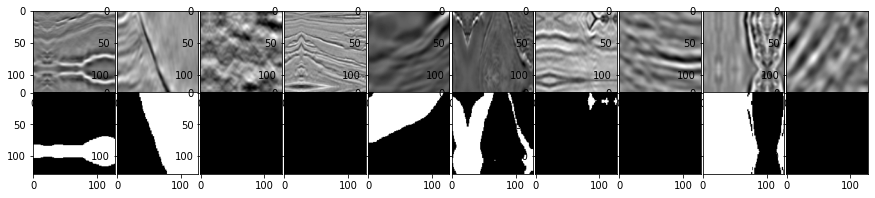

In [14]:
import matplotlib.pyplot as plt

from utils import sample
imgs = sample(dataset, 10)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0, wspace=0)
offset = len(imgs)
for i in range(offset):
    ax = fig.add_subplot(2, offset, i+1)
    ax.imshow(imgs[i][0], cmap='gray')
    
    ax = fig.add_subplot(2, offset, i+1+offset)
    ax.imshow(imgs[i][1], cmap='gray')
    
plt.show()

In [16]:
def build_train_val_loader(data_path, batch_size):
    train_df = pd.read_csv(data_path+'train.csv')
    train_set, val_set = build_validation_set(train_df)
    train_dataset = TGSDatasetAlbu(train_set, data_path+'train/images', 
                                   data_path+'train/masks', train_transform)
    val_dataset = TGSDatasetAlbu(val_set, data_path+'train/images', 
                                 data_path+'train/masks', validation_transform)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
    
    return train_dataloader, val_dataloader